In [5]:
library(ggplot2)
library(data.table)
library(dplyr)


source('R/utils/helper.R')
source("R/utils/summary_utils.R")

Warning message:
"package 'data.table' was built under R version 4.4.3"
Warning message:
"package 'dplyr' was built under R version 4.4.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"


In [7]:
############################ GPT-3.5 data ##########################
gpt_data = read.csv('img_data/img_gpt_4_vision.csv')
gpt_data$X = NULL
colnames(gpt_data) = c("subjID", "trial", "choice", "outcome", "probsX", "probsY")

gpt_data_df <- as.data.table(gpt_data)
gpt_counts <- gpt_data_df %>%
  group_by(subjID) %>%
  summarise(X = sum(choice == "0"),
            Y = sum(choice == "1"))
gpt_counts['condition'] = "GPT-3.5"
gpt_counts['group'] = "Before"
mean(gpt_counts$X)

[1] 23.38

In [9]:
############################ GPT-3.5_vs_ADV ###################################
sim_gpt_list <- list()
for (i in 1:49){
  data = read.csv(paste0("evaluate_model/RNN_adv_sim_400000_eps_0.01_lr_0.001/gpt/events_", i,".csv"))
  sim_gpt_list <- append(sim_gpt_list, list(data))
}

sim_gpt <- do.call(rbind, sim_gpt_list)
sim_gpt['subjID'] = rep(1:49, each = 100)
sim_gpt$subjID <- paste(sim_gpt$subjID, "gpt-3.5", sep="-")

# colnames(df) = c("subjID", "trial", "choice", "outcome", "probsX", "probsY")
sim_gpt['choice'] =  factor(sim_gpt$real.model.action, 
                            levels = c("[[1. 0.]]", "[[0. 1.]]"),
                            labels = c("0", "1"))
sim_gpt <- sim_gpt %>% 
  mutate(outcome = case_when(choice==1 & r2==0 ~ 0,
                             choice==1 & r2==1 ~ 1,
                             choice==0 & r1==0 ~ 0,
                             choice==0 & r1==1 ~ 1)) 

sim_gpt_df <- as.data.table(sim_gpt)
sim_gpt_counts <- sim_gpt_df %>%
  group_by(subjID) %>%
  summarise(X = sum(choice == "0"),
            Y = sum(choice == "1"))
sim_gpt_counts['condition'] = "GPT"
sim_gpt_counts['group'] = "After"
mean(sim_gpt_counts$X)

[1] 56.46939

## Human Data

In [12]:
#############################  human data ###########################
human_dynamic = read.csv('human_data/merged_dynamic.csv') ## 97 subjects
human_static = read.csv("human_data/merged_static.csv") ## 387 subjects
human_combined = rbind(human_dynamic, human_static)
human_combined$X = NULL
colnames(human_combined) = c("choice", "outcome", "subjID", "block", "schedule_type")
human_counts <- human_combined %>%
  group_by(subjID) %>%
  summarise(X = sum(choice == "0"),
            Y = sum(choice == "1"))
human_counts['condition'] = "Human"
human_counts['group'] = "Before"

In [16]:
############################### human vs. ADV ######################
dirs = list.files("human_data/human_adv_data/", full.names = TRUE, recursive = FALSE)
# require(ramify)
sim_human_list = list()
for (d in dirs){
  data = read.csv(d)
  sim_human_list <- append(sim_human_list, list(data))
}
sim_human <- do.call(rbind, sim_human_list)
sim_human['subjID'] = rep(1:157, each = 100)
sim_human_table <- as.data.table(sim_human)

sim_human_counts <- sim_human_table %>%
                       group_by(subjID) %>%
                       summarise(X = sum(is_biased_choice == " true"),
                                 Y = sum(is_biased_choice == " false"))
sim_human_counts['condition'] = "Human"
sim_human_counts['group'] = "After"

## Gemini

In [19]:
############################ GPT-4 data ##########################
gpt4_data = read.csv('img_data/img_gemini.csv')
gpt4_data$X = NULL
colnames(gpt4_data) = c("subjID", "trial", "choice", "outcome", "probsX", "probsY")

gpt4_data_df <- as.data.table(gpt4_data)
gpt4_counts <- gpt4_data_df %>%
  group_by(subjID) %>%
  summarise(X = sum(choice == "0"),
            Y = sum(choice == "1"))
gpt4_counts['condition'] = "GPT-4"
gpt4_counts['group'] = "Before"
mean(gpt4_counts$X)

[1] 25.05

In [21]:
############################ GPT-4_vs_ADV ###################################
sim_gpt4_list <- list()
for (i in 0:49){
  data = read.csv(paste0("evaluate_model/RNN_adv_sim_400000_eps_0.01_lr_0.001/gemini_geminienv/events_", i,".csv"))
  sim_gpt4_list <- append(sim_gpt4_list, list(data))
}

sim_gpt4 <- do.call(rbind, sim_gpt4_list)
sim_gpt4['subjID'] = rep(0:49, each = 100)
sim_gpt4$subjID <- paste(sim_gpt4$subjID, "gpt-4", sep="-")
# colnames(df) = c("subjID", "trial", "choice", "outcome", "probsX", "probsY")
sim_gpt4['choice'] =  factor(sim_gpt4$real.model.action, 
                            levels = c("[[1. 0.]]", "[[0. 1.]]"),
                            labels = c("0", "1"))
sim_gpt4 <- sim_gpt4 %>% 
  mutate(outcome = case_when(choice==1 & r2==0 ~ 0,
                             choice==1 & r2==1 ~ 1,
                             choice==0 & r1==0 ~ 0,
                             choice==0 & r1==1 ~ 1)) 

sim_gpt4_df <- as.data.table(sim_gpt4)
sim_gpt4_counts <- sim_gpt4_df %>%
  group_by(subjID) %>%
  summarise(X = sum(choice == "0"),
            Y = sum(choice == "1"))
sim_gpt4_counts['condition'] = "GPT-4"
sim_gpt4_counts['group'] = "After"
mean(sim_gpt4_counts$X)

[1] 55.72

Warning message:
"The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead."
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mplots[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


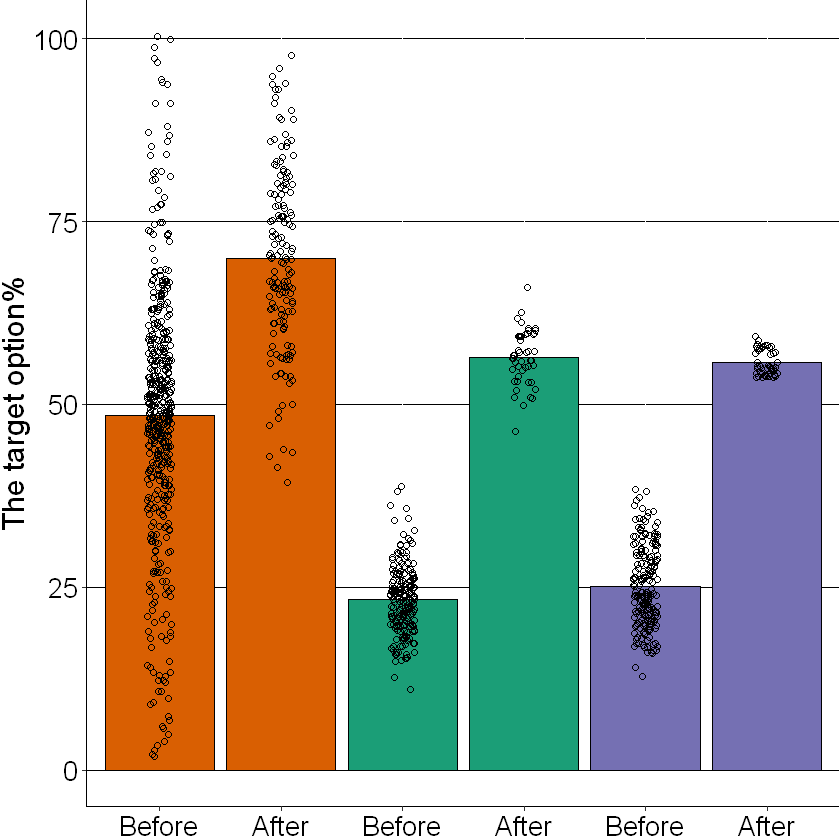

In [23]:
merge_df = rbind(human_counts, sim_human_counts)
merge_df = rbind(merge_df, gpt_counts)
merge_df = rbind(merge_df, sim_gpt_counts)
merge_df = rbind(merge_df, gpt4_counts)
merge_df = rbind(merge_df, sim_gpt4_counts)
merge_df['combine'] = paste0(merge_df$condition, merge_df$group, sep="")
# write.csv(merge_df, "R/merge_df.csv", row.names = FALSE)
ggplot(merge_df, aes(x=combine, y=X, fill=condition))+
  # geom_boxplot()+
  stat_summary(fun.y = "mean", geom = "bar", position = position_dodge(), color="black", size=0.2) +
  # stat_summary(fun.data = mean_cl_normal, geom="linerange", colour=error_bar_colour,
  #              position=position_dodge(.9),  fun.args = list(mult = 1)) +
  # geom_point(color="black", position=position_nudge(x = -0.2, y = 0), alpha=0.5, size=1) +
  # geom_line(aes(group=subjID), alpha= 0.1, position=position_nudge(x = -0.2, y = 0), size=0.7) +
  geom_jitter(shape=1, position=position_jitter(0.1))+
  scale_fill_manual(values=c("Human"="#d95f02",      # Green from Dark2
                             "GPT-3.5"="#1b9e77",    # Orange from Dark2
                             "GPT-4"="#7570b3")) +   # Purple from Dark2
  scale_x_discrete(limits = c("HumanBefore", "HumanAfter",
                              "GPT-3.5Before", "GPT-3.5After", 
                              "GPT-4Before", "GPT-4After"),
                   labels = c("Before", "After", "Before", "After", "Before", "After")) +
  guides(fill = guide_legend(keywidth = 0.5, keyheight = 3.0))+
  theme_no_legend_x_title()+
  theme(axis.title.y = element_text(size = 18), # Increase Y-axis label size and make it bold
        axis.text.x = element_text(size = 16), # Increase X-axis tick text size
        axis.text.y = element_text(size = 16)) + # Increase legend title size
  ylab("The target option%")
ggsave("plots/BA_ADV.pdf", width=12, height=15, unit="cm", useDingbats=FALSE)

ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mplots[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


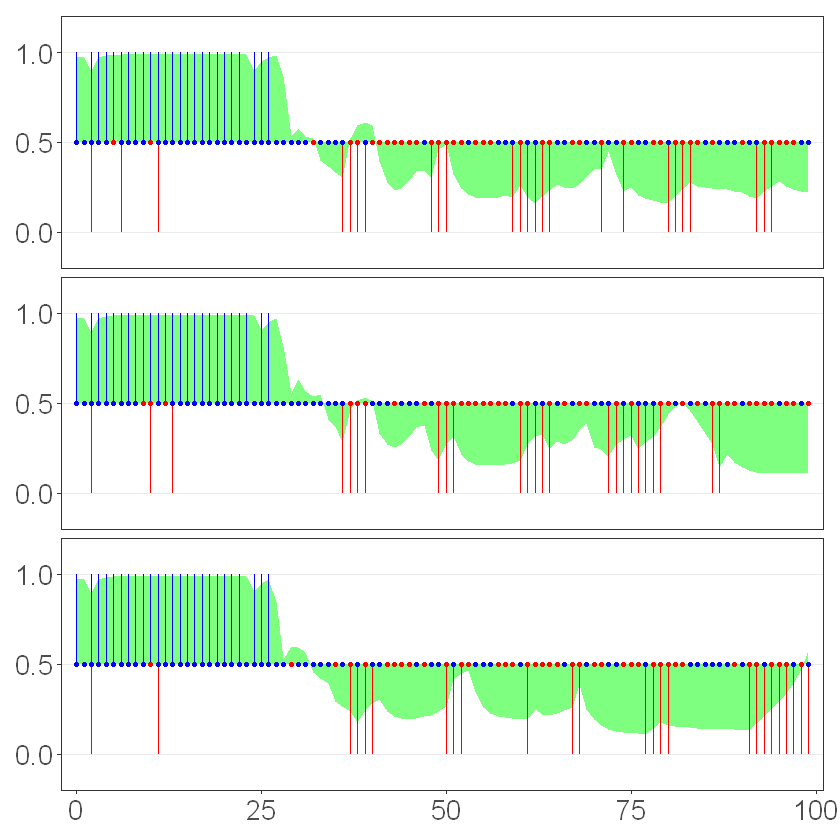

In [25]:
library(ggplot2)
dd = list()
indx = 1
# for (i in 12:14){ #for GPT3.5
for (i in 1:3){ # for GPT-4
  # data = read.csv(paste0("evaluate_model/RNN_adv_sim_400000_eps_0.01_lr_0.001/gpt-3.5-turbo/events_", i,".csv"))
  # pol = read.csv(paste0("evaluate_model/RNN_sim/gpt-3.5-turbo/policies/policies_", i,".csv"))
  data = read.csv(paste0("evaluate_model/RNN_adv_sim_400000_eps_0.01_lr_0.001/gpt/events_", i,".csv"))
  pol = read.csv(paste0("evaluate_model/RNN_sim/gpt/policies/policies_", i,".csv"))

  data$ev = i
  data$pol0 = NA
  data$pol1 = NA
  data$pol0 = pol$X0
  data$pol1 = pol$X1
  dd[[indx]] =data
  indx = indx + 1
}

require(data.table)
data = rbindlist(dd)
action_levels = levels(data$real.model.action)
data$rnn.action = as.character(data$real.model.action)

data$ev2 = factor(data$ev, levels=rev(levels(as.factor(data$ev))))
require(ggplot2)
ggplot() +
  scale_color_manual(name="action", values=c("red", "blue")) +
  geom_ribbon(data = subset(data, T), aes(x=X, ymin=0.5, ymax=pol0), fill="green", alpha=0.5) +
  geom_segment(data = subset(data, r1 == 1), aes(x=X, xend=X, y=0.5, yend=1), show.legend=FALSE, color="blue") +
  geom_segment(data = subset(data, r2 == 1), aes(x=X, xend=X, y=0.5, yend=0), show.legend=FALSE, color="red") +
  scale_y_continuous(breaks=c(0, 0.5, 1), limits = c(0,1), expand = c(0.1, 0.1)) +
  scale_x_continuous(expand = c(0.02, 0.02)) +
  geom_point(data = data, aes(x=X, color=as.factor(rnn.action), y = 0.5), show.legend=FALSE, size=1) +
  theme_bw() +
  theme(
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    text = element_text(size=16),
    axis.text = element_text(size=16),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_blank(),
    strip.text = element_blank(),
    plot.margin = margin(t = 10, r = 10, b = 10, l = 10, unit = "pt")  # Adjust these values as needed
  ) +
  facet_grid(ev2 ~ .) +
  xlab("trial")
ggsave("plots/ADV_strategy4.pdf", width=20, height=7, unit="cm", useDingbats=FALSE)




ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mplots[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


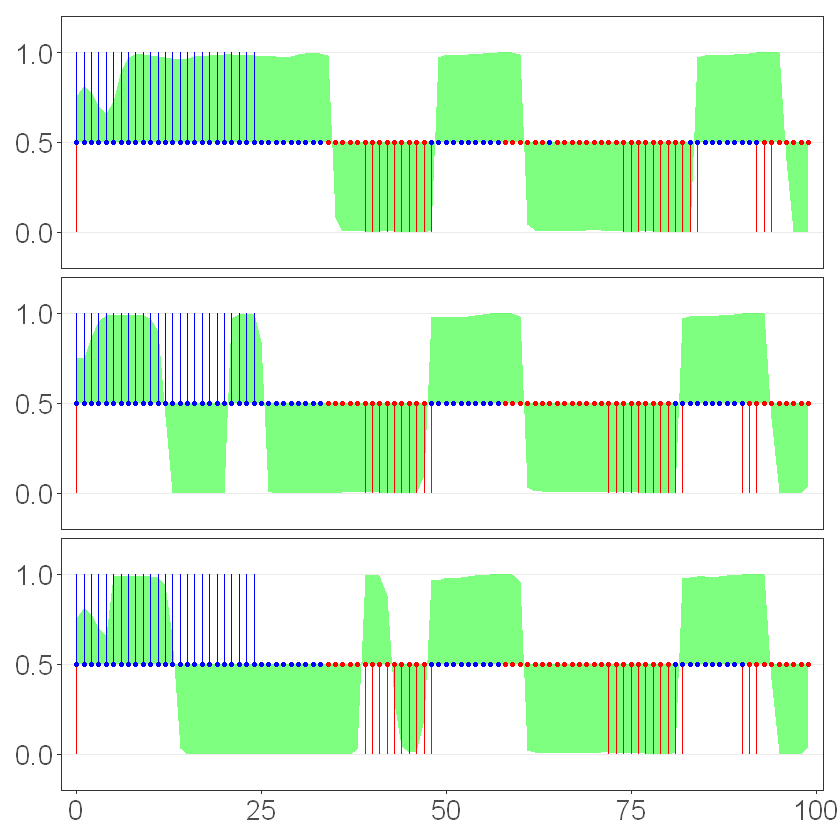

In [27]:
library(ggplot2)
dd = list()
indx = 1
# for (i in 12:14){ #for GPT3.5
for (i in 1:3){ # for GPT-4
  # data = read.csv(paste0("evaluate_model/RNN_adv_sim_400000_eps_0.01_lr_0.001/gpt-3.5-turbo/events_", i,".csv"))
  # pol = read.csv(paste0("evaluate_model/RNN_sim/gpt-3.5-turbo/policies/policies_", i,".csv"))
  data = read.csv(paste0("evaluate_model/RNN_adv_sim_400000_eps_0.01_lr_0.001/gemini_geminienv/events_", i,".csv"))
  pol = read.csv(paste0("evaluate_model/RNN_sim/geminienv/policies/policies_", i,".csv"))

  data$ev = i
  data$pol0 = NA
  data$pol1 = NA
  data$pol0 = pol$X0
  data$pol1 = pol$X1
  dd[[indx]] =data
  indx = indx + 1
}

require(data.table)
data = rbindlist(dd)
action_levels = levels(data$real.model.action)
data$rnn.action = as.character(data$real.model.action)

data$ev2 = factor(data$ev, levels=rev(levels(as.factor(data$ev))))
require(ggplot2)
ggplot() +
  scale_color_manual(name="action", values=c("red", "blue")) +
  geom_ribbon(data = subset(data, T), aes(x=X, ymin=0.5, ymax=pol0), fill="green", alpha=0.5) +
  geom_segment(data = subset(data, r1 == 1), aes(x=X, xend=X, y=0.5, yend=1), show.legend=FALSE, color="blue") +
  geom_segment(data = subset(data, r2 == 1), aes(x=X, xend=X, y=0.5, yend=0), show.legend=FALSE, color="red") +
  scale_y_continuous(breaks=c(0, 0.5, 1), limits = c(0,1), expand = c(0.1, 0.1)) +
  scale_x_continuous(expand = c(0.02, 0.02)) +
  geom_point(data = data, aes(x=X, color=as.factor(rnn.action), y = 0.5), show.legend=FALSE, size=1) +
  theme_bw() +
  theme(
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    text = element_text(size=16),
    axis.text = element_text(size=16),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_blank(),
    strip.text = element_blank(),
    plot.margin = margin(t = 10, r = 10, b = 10, l = 10, unit = "pt")  # Adjust these values as needed
  ) +
  facet_grid(ev2 ~ .) +
  xlab("trial")
ggsave("plots/ADV_strategy4.pdf", width=20, height=7, unit="cm", useDingbats=FALSE)


